### I want to calculate the probability of winning a territory in relation to how many armies present in the duel.

<font color='red'> I specify that the number of attackers corresponds precisely to the number of dice that will be rolled and not to the precise number of armies in the territory of the attacker since we know that the attacker will always count one less army.</font>

Example:
- number of armies in the attacking territory = 4
- number of armies in the territory to be conquered = 2
- result: 3 attacking dice vs 2 defending dice

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Fights functions

def dice_result(n_dice):
    
    if (n_dice > 3):
        n_dice = 3

    return sorted([random.randint(1,6) for _ in range(n_dice)])

def fight(n_attackers, n_defenders):

    attack = dice_result(n_attackers)
    defense = dice_result(n_defenders)

    fights = min(len(attack), len(defense))

    for i in range(1, fights+1):

        if(attack[-i] > defense[-i]):
            # Attacker win
            n_defenders -= 1
        else:
            # Defender win
            n_attackers -=1

    # How many armies left
    return n_attackers, n_defenders


In [ ]:
# Fights simulations

n_simulations = 100000
wins = 0

wins_results = pd.DataFrame(index=range(1, 21), columns=range(1, 21))

for a in range(1, 21):
    for d in range(1, 21):

        wins = 0

        for i in range(n_simulations):

            n_attackers = a
            n_defenders = d

            while((n_attackers != 0) & (n_defenders != 0)):
                esito = fight(n_attackers, n_defenders)
                n_attackers = esito[0]
                n_defenders = esito[1]

            if(n_attackers != 0):
                wins += 1

        wins_perc = round(wins/n_simulations * 100, 2)
        wins_perc
    
        wins_results.loc[a, d] = wins_perc

wins_results

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,41.5,10.78,1.87,0.32,0.04,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.61,35.94,12.18,4.95,1.6,0.65,0.23,0.09,0.03,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.5,65.72,32.53,21.06,11.72,5.71,3.33,1.69,0.85,0.45,0.27,0.12,0.06,0.04,0.02,0.01,0.01,0.0,0.0,0.0
4,97.15,78.61,43.42,31.14,19.18,11.05,7.01,3.98,2.25,1.31,0.73,0.39,0.25,0.12,0.06,0.04,0.02,0.01,0.01,0.01
5,99.03,89.01,56.64,40.87,27.65,17.49,11.47,7.01,4.42,2.65,1.53,0.95,0.57,0.36,0.18,0.09,0.07,0.03,0.02,0.01
6,99.7,93.56,68.61,52.41,37.72,25.63,17.28,11.6,7.28,4.56,2.97,1.78,1.03,0.62,0.41,0.22,0.16,0.09,0.05,0.02
7,99.88,96.7,75.45,60.5,46.01,33.18,23.83,15.99,10.93,7.23,4.77,3.09,1.94,1.19,0.81,0.5,0.3,0.19,0.09,0.06
8,99.96,97.95,81.44,68.32,54.24,41.14,30.42,21.73,15.25,10.45,7.2,4.81,3.21,2.13,1.36,0.85,0.48,0.35,0.21,0.14
9,99.98,99.07,86.95,74.82,61.5,48.64,37.27,28.24,20.29,14.64,10.47,7.11,4.69,3.14,2.12,1.38,0.92,0.59,0.37,0.25
10,99.99,99.4,90.03,79.51,68.25,55.72,44.08,34.1,25.71,19.07,13.66,9.73,6.89,4.62,3.18,2.28,1.47,0.95,0.62,0.42


/var/folders/vs/0q2hr_t979jcyw83xl1kt9280000gn/T/ipykernel_31850/1910176436.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wins_results_copy = wins_results.iloc[::-1].iloc[:,:16].fillna(0).astype(float)


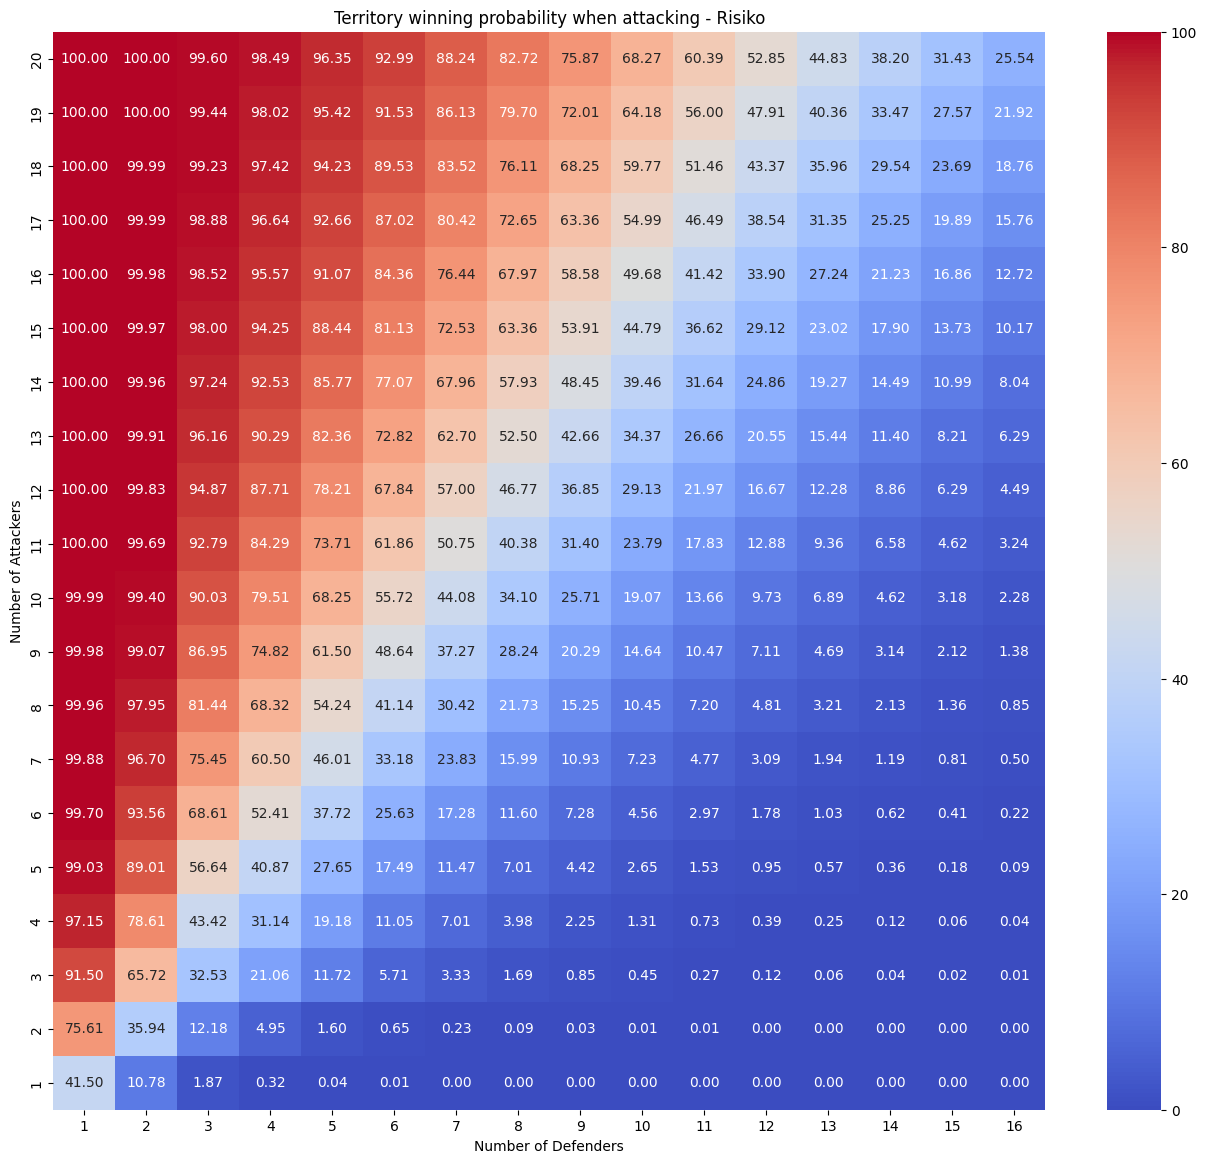

In [17]:
# Heatmap

# Reverse the order of the elements
wins_results_copy = wins_results.iloc[::-1].iloc[:,:16].fillna(0).astype(float)

plt.figure(figsize=(16, 14))
sns.heatmap(wins_results_copy, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.xlabel("Number of Defenders", )
plt.ylabel("Number of Attackers")
plt.title("Territory winning probability when attacking - Risiko")
plt.show()